<h1 style='color: blue; font-size: 36px; font-weight: bold;'>Transformação de dados 🤖</h1>

<h1 style='color: red; font-size: 24px; font-weight: bold;'>Teoria 📃</h1>

👉 Neste experimento irei testar diferentes técnicas de transformação de features.

👉 O primeiro caso será em relação à features com distribuições assimétricas tanto à direita quanto à esquerda. 

👉 A ideia é deixar a distribuição dos dados mais próxima de uma normal diminuindo a influência de valores extremos (outliers).

👉 Os tipos de algoritmos de ML afetados pela escala dos dados são: Linear e logistic regression, SVM, KNN, k-means, PCA, LDA.

<h1 style='color: red; font-size: 24px; font-weight: bold;'>Imports 📚</h1>

In [1]:
#Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importando minhas funções
import import_ipynb
import functions as fc

#SKLearn
from sklearn.feature_selection import SelectKBest #Selecção de Features
from sklearn.model_selection import train_test_split #Divisão de treino e teste

#Scalers
from sklearn.preprocessing import MinMaxScaler #MinMaxScaler
from sklearn.preprocessing import StandardScaler #Standard
from sklearn.preprocessing import RobustScaler #Robust
from sklearn.preprocessing import Normalizer #Normal
from sklearn.preprocessing import PowerTransformer #boxcox
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

#Model
from sklearn.linear_model import LogisticRegression #modelo de regressão logística

#Metric
from sklearn.metrics import accuracy_score #AUC Score

importing Jupyter notebook from functions.ipynb


<h1 style='color: red; font-size: 24px; font-weight: bold;'>Build data 📚</h1>

👉 Cria-se um dataset com 500 amostras e 10.000 features com distribuição normal

👉 Cria-se outros 2 datasets de mesmo shape porém com distribuições assimétricas tanto à esquerda quanto à direita

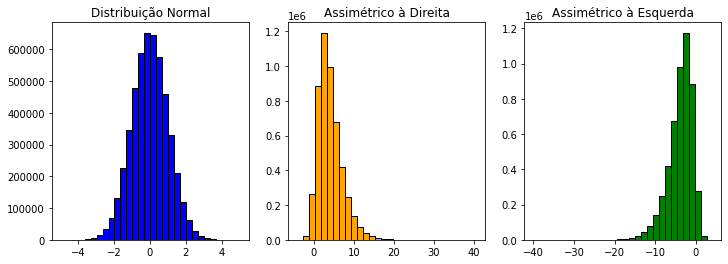

In [2]:
# Criar uma matriz com distribuição normal com 500 amostras e 10.000 features
X_normal = np.random.randn(500, 10000)

# Adicionar uma distribuição gama assimétrica à direita
X_assimetrico_direita = X_normal + np.random.gamma(2, scale=2, size=(500, 10000))

# Adicionar uma distribuição gama assimétrica à esquerda
X_assimetrico_esquerda = X_normal - np.random.gamma(2, scale=2, size=(500, 10000))

# Criar o target de rótulos binários
y = np.random.choice(2, size=500)

# DataFrames para visualização
df_normal = pd.DataFrame(data=X_normal, #Dados normais 
                         columns=[f'feature_{i}' for i in range(X_normal.shape[1])] #features
                        ) 

df_assimetrico_direita = pd.DataFrame(data=X_assimetrico_direita, #Dados assimétricos
                                      columns=[f'feature_{i}_direita' for i in range(X_assimetrico_direita.shape[1])] #features
                                     ) 

df_assimetrico_esquerda = pd.DataFrame(data=X_assimetrico_esquerda, 
                                       columns=[f'feature_{i}_esquerda' for i in range(X_assimetrico_esquerda.shape[1])] #features
                                      ) 

# plot
plt.figure(figsize=(12, 4))

#plot do histograma normal
plt.subplot(1, 3, 1)
plt.hist(X_normal.flatten(), bins=30, color='blue', edgecolor='black')
plt.title('Distribuição Normal')

plt.subplot(1, 3, 2)
plt.hist(X_assimetrico_direita.flatten(), bins=30, color='orange', edgecolor='black')
plt.title('Assimétrico à Direita')

plt.subplot(1, 3, 3)
plt.hist(X_assimetrico_esquerda.flatten(), bins=30, color='green', edgecolor='black')
plt.title('Assimétrico à Esquerda')

plt.show()

* #### Unindo os dfs

In [3]:
df_final = pd.concat([df_normal, df_assimetrico_direita, df_assimetrico_esquerda], axis=0, ignore_index=True)

In [4]:
df_final.shape

(1500, 30000)

In [5]:
df = df_final.copy()

<h1 style='color: red; font-size: 24px; font-weight: bold;'>Data Transform ⚙</h1>

* ### Right-Skewed Distribution

Pode ser tratada com as seguintes técnicas: raiz quadrada, raiz cúbica e log.

* ### Left-Skewed Distribution

Pode ser tratada com as seguintes técnicas: raíz quadrada, elevar ao quadrado, raiz cúbica e log. Entretanto, log tem um fator especial a ser considerado, você deverá criar uma condicional para os casos de valores negativos considerar a seguinte fórmula: -log(abs(-x)) e para os casos 0 deverá somar 1, exemplo: log(0+1), pois log(1) é zero.

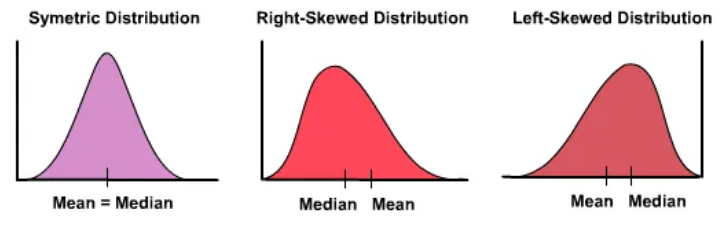

* ### OBS

Há estudos que dizem que a transformação log não funciona para left-skewed e para o right-skewed só em casos quando os valores são menores e positivos.

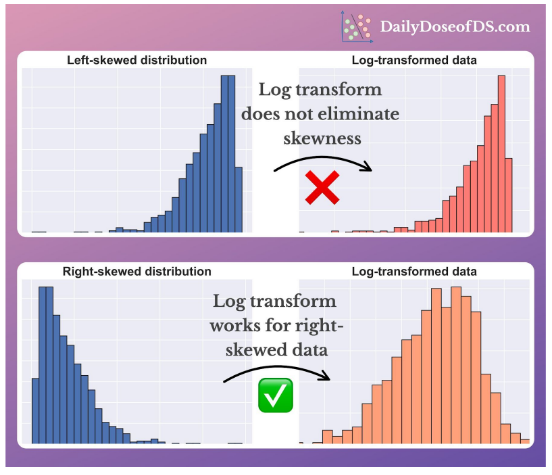

### 1️⃣ Aplicando log

Vou testar a técnica do log com uma variável assimétrica à direita e à esquerda

* #### Direita

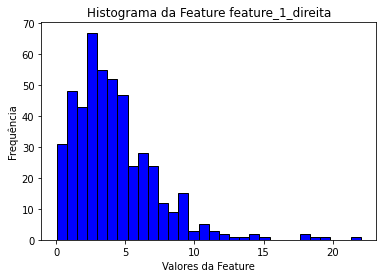

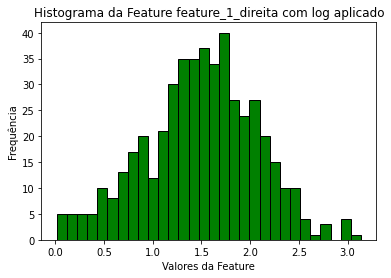

---------------------------------------
variância sem log: 9.77951693528906
variância com log: 0.33206162911697207
---------------------------------------


In [8]:
fc.logTrans(df=df, feature='feature_1_direita')

* #### esquerda

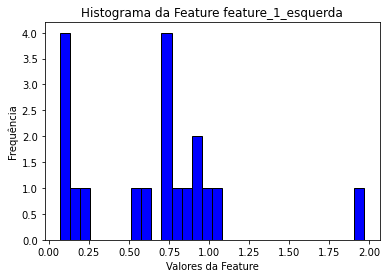

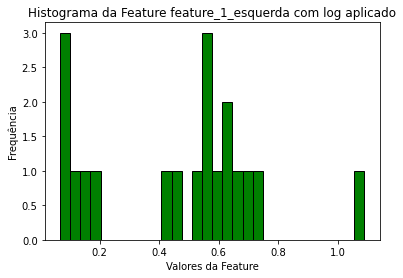

---------------------------------------
variância sem log: 0.21922065806403992
variância com log: 0.07710397337398688
---------------------------------------


In [7]:
fc.logTrans(df=df, feature='feature_1_esquerda')

👉 Observa-se que ao aplicar o log em uma distribuição com assimetria à direita, ela passou a se comportar como uma distribuição normal. 

👉 A variância foi de 9.77 para 0.33, pois como os xi's passaram por transformações isso muda os seus valores e a média, alterando a variância por consequência.

👉 Já para a distribuição assimétrica à esquerda (filtrando valores >0) não foi possível aplicar esta transformação.

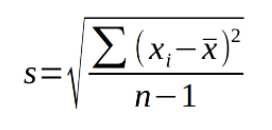

## ▶ Resumo

👉 Tranformação logaritma pode ser aplicada em uma distribuição assimétrica à direita. Já à esquerda isso não funciona.

### 2️⃣ Aplicando transformação ao quadrado

* #### Direita

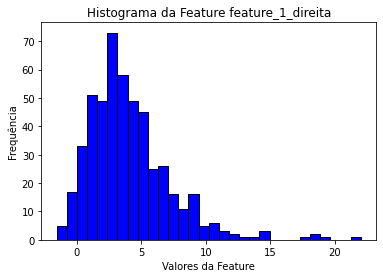

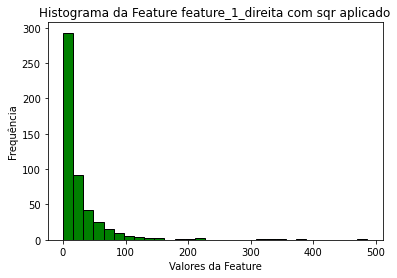

---------------------------------------
variância sem sqr: 10.29363672156385
variância com sqr: 2248.453362640138
---------------------------------------


In [9]:
fc.sqrTrans(df=df, feature = 'feature_1_direita')

👉 Observa-se que elevar ao quadrado não deixou a distribuição assimétrica à direita próximo de uma normal, e ainda aumentou muito o valor da variância.

* #### esquerda

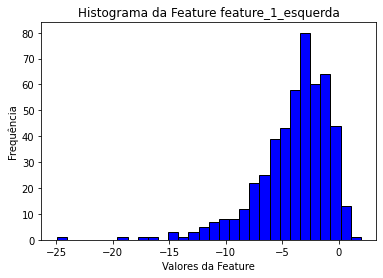

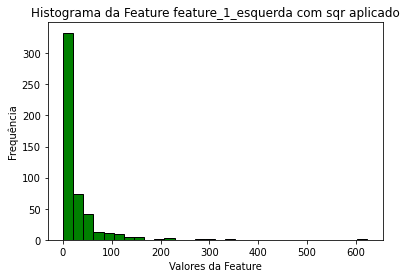

---------------------------------------
variância sem sqr: 10.808523800668661
variância com sqr: 2379.125863773362
---------------------------------------


In [10]:
fc.sqrTrans(df=df, feature = 'feature_1_esquerda')

👉 O mesmo acontece com a variável com distribuição assimétrica à esquerda. Porém normalmente esta técnica deveria funcionar, mas neste caso o dataset que eu montei criou distribuições assimétricas à esquerda com valores negativos, então só havera um método que vai resolver este problema, e será explicado adiante.

## ▶ Resumo

👉 Tranformação ao quadrado pode ser aplicada em uma distribuição assimétrica à esquerda com valores positivos. Já à direita isso não funciona.

### 3️⃣ box-cox

Só pode ser aplicado à valores estritamente positivos e maiores que zero!
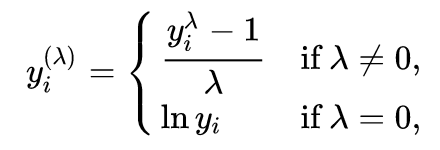

* #### direita

In [21]:
#Filtrando os valores positivos
df_positivo = df[df['feature_1_direita']>0]

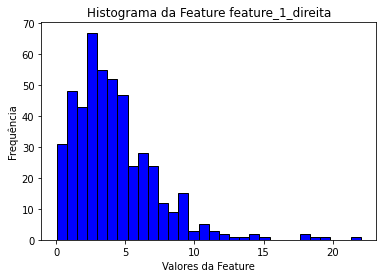

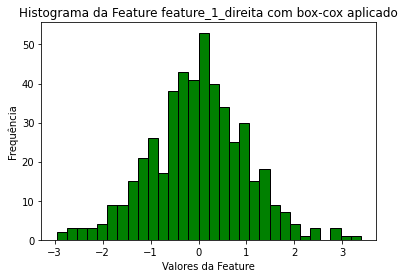

---------------------------------------
variância sem box-cox: 9.77951693528906
variância com box-cox: 0    1.002096
dtype: float64
---------------------------------------


In [20]:
fc.boxcox(df=df_positivo, feature = 'feature_1_direita')

* #### esquerda

In [22]:
#Filtrando os valores positivos
df_positivo = df[df['feature_1_esquerda']>0]

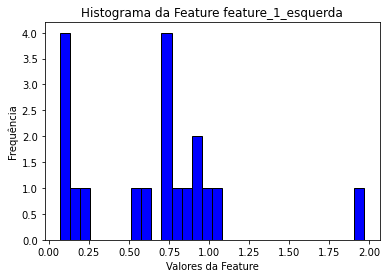

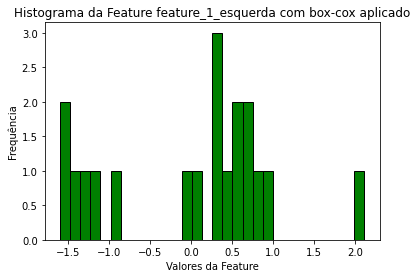

---------------------------------------
variância sem box-cox: 0.21922065806403992
variância com box-cox: 0    1.055556
dtype: float64
---------------------------------------


In [23]:
fc.boxcox(df=df_positivo, feature = 'feature_1_esquerda')

## ▶ Resumo

👉 Tranformação boxcox pode ser aplicada em uma distribuição com valores maiores que zero, e ela funciona muito bem em assimetria tanto à direita quanto à esquerda. Como temos poucos valores positivos na assimetria à esquerda, não foi possível demonstrar esta técnica.

### 4️⃣ yeo-johnson

Este método é uma adaptação do boxcox e que serve para distribuições assimétricas de valores negativos.

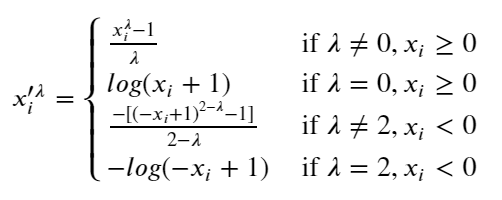

* #### direita

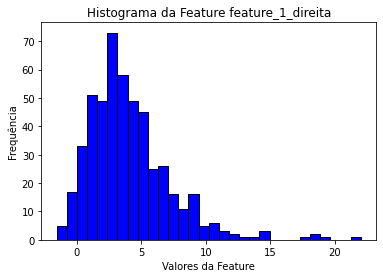

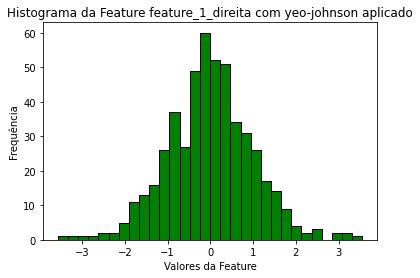

---------------------------------------
variância sem yeo-johnson: 10.29363672156385
variância com yeo-johnson: 0    1.002004
dtype: float64
---------------------------------------


In [24]:
fc.yeojohnsonTrans(df=df, feature = 'feature_1_direita')

* #### esquerda

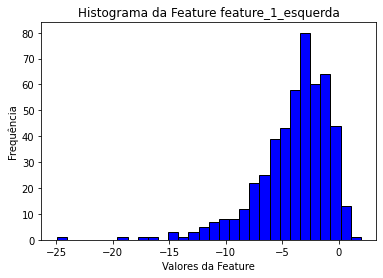

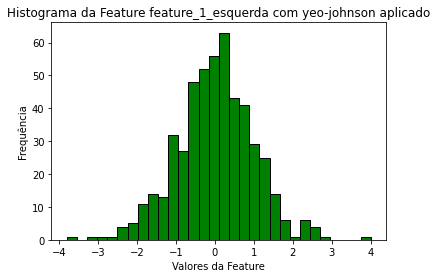

---------------------------------------
variância sem yeo-johnson: 10.808523800668661
variância com yeo-johnson: 0    1.002004
dtype: float64
---------------------------------------


In [25]:
fc.yeojohnsonTrans(df=df, feature = 'feature_1_esquerda')

## ▶ Resumo

👉 Tranformação yeojohnson pode ser aplicada em uma distribuição com valores maiores ou menores que zero, e ela funciona muito bem em assimetria tanto à direita quanto à esquerda. Até então mostrando ser a melhor.

### 5️⃣ raiz quadrada e cúbica

* #### direita

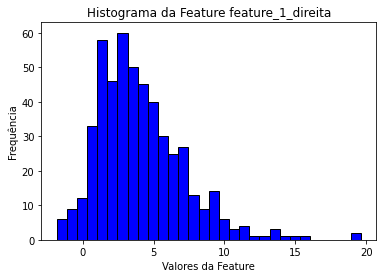

C:\Users\lucas\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


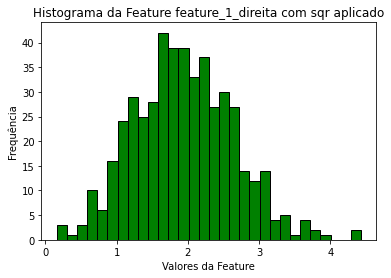

---------------------------------------
variância sem sqr: 9.47340545123085
variância com sqr: 0.49243737511513286
---------------------------------------


In [6]:
fc.sqrtTrans(df=df, feature = 'feature_1_direita')

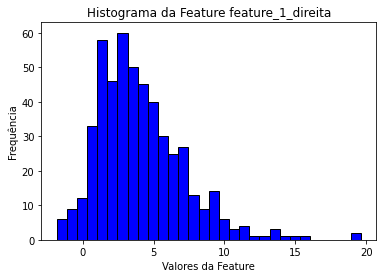

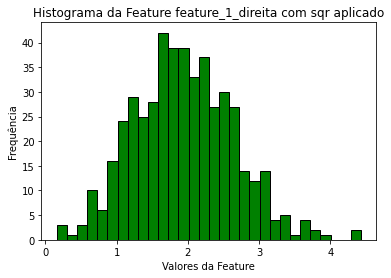

---------------------------------------
variância sem sqr: 9.47340545123085
variância com sqr: 0.49243737511513286
---------------------------------------


In [8]:
fc.cubicTrans(df=df, feature = 'feature_1_direita')

* #### esquerda

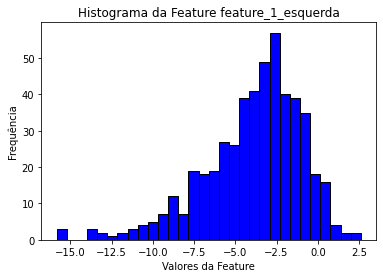

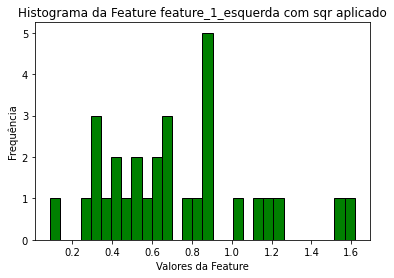

---------------------------------------
variância sem sqr: 9.078894893891862
variância com sqr: 0.13451101069095167
---------------------------------------


In [7]:
fc.sqrtTrans(df=df, feature = 'feature_1_esquerda')

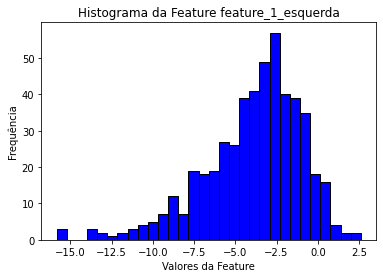

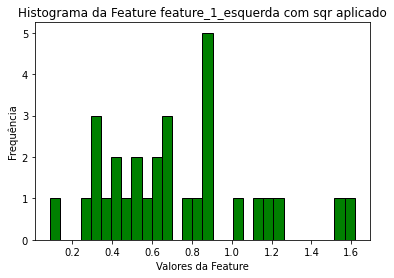

---------------------------------------
variância sem sqr: 9.078894893891862
variância com sqr: 0.13451101069095167
---------------------------------------


In [9]:
fc.cubicTrans(df=df, feature = 'feature_1_esquerda')

## ▶ Resumo

👉 Tranformação de raíz quadrada e cúbica pode ser aplicada em uma distribuição assimétrica à direita, mas não em uma assimétrica à esquerda.

## 📍 Conclusão

* ### Assimetria à direita


* Técnicas: log, raíz quadrada, raíz cúbica, boxcox, yeo-johnson.


* ### Assimetria à esquerda


* Técnicas: elevar ao quadrado (valores positivos), elevar ao cubo, boxcox (valores positivos), yeo-johnson.

* ### Aplicando Padronização

👉 As variáveis irão resultar em uma média igual a 0 e um desvio padrão e variância igual a 1

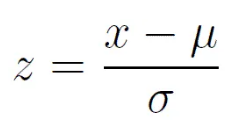

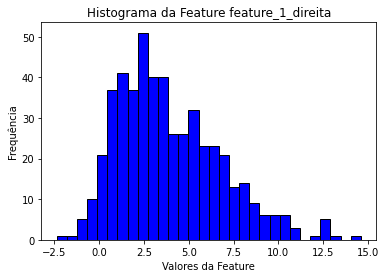

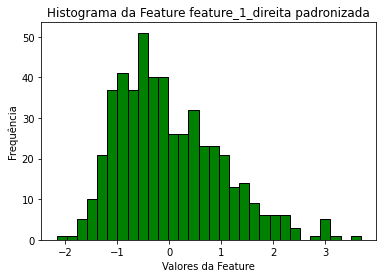

---------------------------------------
variância sem padronização: 8.416289675250805
variância com padronização: nan
---------------------------------------


In [6]:
fc.padronizacao(df=df, feature = 'feature_1_direita')

👉 A distribuição da feature não muda, ou seja, continua assimétrica à direita, porém com uma variância igual a 1 e média igual a 0.

* ### Normalização

👉 As variáveis ficam dentro do intervalo de 0 e 1, e caso tenha resultado negativo -1 e 1

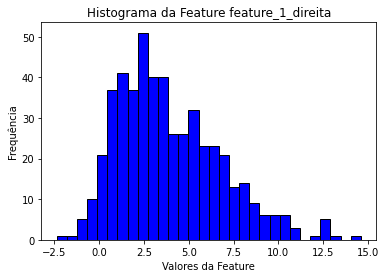

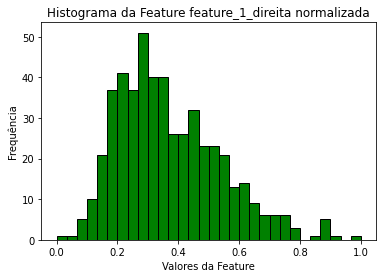

---------------------------------------
variância sem normalização: 8.416289675250805
variância com normalização: nan
---------------------------------------


In [7]:
fc.normalizacao(df=df, feature = 'feature_1_direita')

* ### Robust Scaler

👉 Usa a mediana e o range do interquartil para fazer o escalonamento dos dados. É robusto à outliers

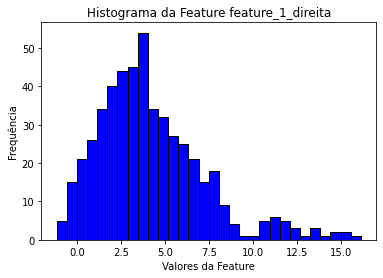

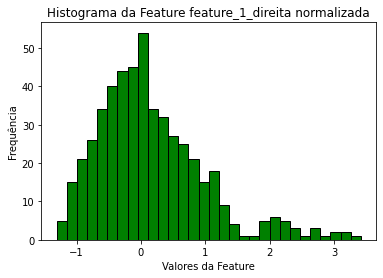

---------------------------------------
variância sem robust: 9.3567861170523
variância com robust: nan
---------------------------------------


In [6]:
fc.robust(df=df, feature = 'feature_1_direita')

## 📍 Conclusão



* ### Padronização

👉 Média da distribuição fica em zero, desvio padrão e variância fica igual a 1.


* ### Normalização

👉 O range da distribuição fica no intervalo [0;1] ou [-1;+1], preserva o formato da distribuição original, mas não reduz a importância dos outliers


* ### Robust

👉 O range é maior do que o intervalo da normalização e da padronização e é robusto a outliers, podendo ser uma opção para eliminar o efeito deles no modelo a ser treinado.